In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'cancer.h5',
 'cancer.ipynb',
 'cancer2.h5',
 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'test',
 'train']

In [3]:
base_dir = r'C:\Users\AIRLIFT\Desktop\Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['.ipynb_checkpoints', 'cancer.h5', 'cancer.ipynb', 'cancer2.h5', 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 'test', 'train']

Contents of train directory:
['0', '1']

Contents of validation directory:
['0', '1']


In [4]:

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with training 0/1 pictures
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

# Directory with validation 0/1 pictures
validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')


In [5]:
#file names
train_0_fnames = os.listdir( train_0_dir )
train_1_fnames = os.listdir( train_1_dir )

print(train_0_fnames[:10])
print(train_1_fnames[:10])

['10851_504613176_57b02300e00d4542aec32501bb4086cf.png', '10960_1019978559_5a4d2ff7298341dea61b980edcfbba32.png', '10960_143347175_3ad730ef301942acb38e38eb99c01077.png', '10960_1731017221_dde3dc84b176471eb93c710336e9bad8.png', '10960_1982284680_440153a8924b4cdc9e4fd50c801ab846.png', '10960_2116616347_6468e3a2023a488fadff8c3468c314c5.png', '10960_372686829_2dc2962b2fa84d47b064c2386cf6c534.png', '10960_441379575_5cce12a432be459786fb208c9592f07c.png', '10960_746867174_bf01377ad5b542e38500314ccd25b438.png', '11158_1375700402_ea953a0631f8445586f5fcc646cac409.png']
['12725_1435663649_0505a3b39c4c426ca8fa06c9d893806a.png', '12725_1435663649_0a04f820d3fb47e6a68db231d7a35062.png', '12725_1435663649_0d1c1b01a24d46bcbb7dfca40677192c.png', '12725_1435663649_0eb4d716a4834abb8b8a57fbea52096f.png', '12725_1435663649_13bc2df1e7aa49a2b2043504993a0463.png', '12725_1435663649_21279dcf6ed147e38830f7c45f296aa1.png', '12725_1435663649_23b71e995dea476791cd86c6f950799b.png', '12725_1435663649_2485264440d84554

In [6]:
#total number of images
print("total number of images in train's zero folder",len(os.listdir(train_0_dir)))
print("total number of images in train's one folder",len(os.listdir(train_1_dir)))

#validation 
print("total number of images in test's zero folder", len(os.listdir(validation_0_dir)))
print("total number of images in test's one folder", len(os.listdir(validation_1_dir)))

total number of images in train's zero folder 951
total number of images in train's one folder 982
total number of images in test's zero folder 238
total number of images in test's one folder 40


Sample 0 image:


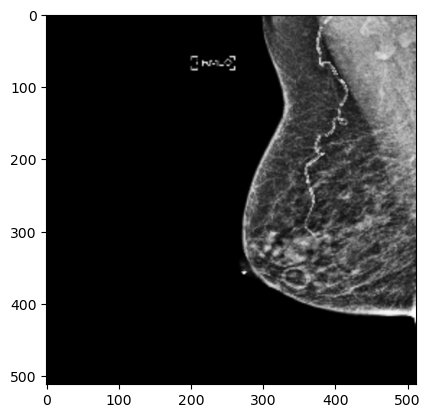


Sample 1 image:


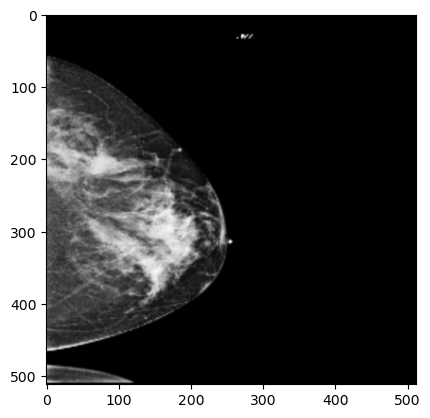

In [7]:
print("Sample 0 image:")
plt.imshow(load_img(f"{os.path.join(train_0_dir, os.listdir(train_0_dir)[0])}"))
plt.show()

print("\nSample 1 image:")
plt.imshow(load_img(f"{os.path.join(train_1_dir, os.listdir(train_1_dir)[0])}"))
plt.show()

In [8]:
#data argumentation on train data and rescale the test data
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR=train_dir, VALIDATION_DIR=validation_dir)

Found 1933 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


In [10]:

def create_model():
  model = tf.keras.models.Sequential([ 
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0008),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy']) 

  return model

In [11]:
# Define a Callback class that stops training once accuracy reaches 99.9%
# it helps to avoid overfittingon training dataset.
# This is also called early stopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.989):
      print("\nReached 98.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [12]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(
                    train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    batch_size=16,
                    verbose = 1, callbacks=[callbacks])

Epoch 1/50
121/121 [==============================] - 70s 572ms/step - loss: 0.6889 - accuracy: 0.5572 - val_loss: 0.7177 - val_accuracy: 0.3381
Epoch 2/50
121/121 [==============================] - 70s 574ms/step - loss: 0.6609 - accuracy: 0.6156 - val_loss: 0.6369 - val_accuracy: 0.5360
Epoch 3/50
121/121 [==============================] - 71s 589ms/step - loss: 0.5943 - accuracy: 0.6705 - val_loss: 0.6140 - val_accuracy: 0.5755
Epoch 4/50
121/121 [==============================] - 72s 591ms/step - loss: 0.5079 - accuracy: 0.7470 - val_loss: 0.5813 - val_accuracy: 0.6547
Epoch 5/50
121/121 [==============================] - 72s 595ms/step - loss: 0.4279 - accuracy: 0.8096 - val_loss: 0.2195 - val_accuracy: 0.9532
Epoch 6/50
121/121 [==============================] - 71s 590ms/step - loss: 0.3512 - accuracy: 0.8608 - val_loss: 0.5913 - val_accuracy: 0.7698
Epoch 7/50
121/121 [==============================] - 72s 591ms/step - loss: 0.3103 - accuracy: 0.8764 - val_loss: 0.3127 - val_ac

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [14]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


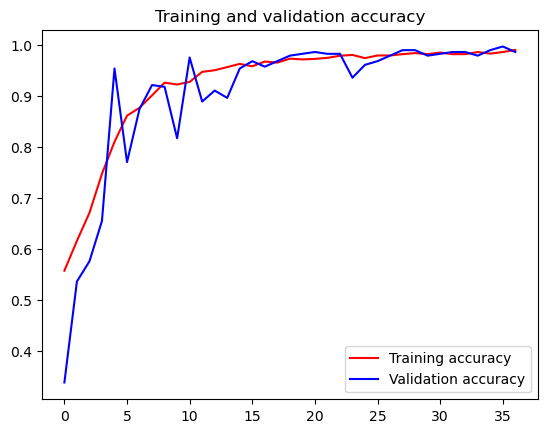

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
model.save("cancer.h5")

C:\Users\AIRLIFT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
(val_label:=validation_generator.labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
#Y-Test
y_test=model.predict_generator(validation_generator)

C:\Users\AIRLIFT\AppData\Local\Temp\ipykernel_15056\1279070077.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_test=model.predict_generator(validation_generator)


In [19]:
threshold=0.5
y_test1=(y_test>=threshold).astype(int)

In [20]:
from sklearn.metrics import jaccard_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [21]:
jaccard_score(val_label,y_test1)

0.025

In [22]:
print(classification_report(val_label,y_test1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       238
           1       0.05      0.05      0.05        40

    accuracy                           0.72       278
   macro avg       0.44      0.44      0.44       278
weighted avg       0.73      0.72      0.72       278



In [23]:
confusion_matrix(val_label,y_test1)

array([[198,  40],
       [ 38,   2]], dtype=int64)

### Transfer learning

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Create an instance of the inception model from the local pre-trained weights
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [25]:

def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (224,224,3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False


  return pre_trained_model

In [26]:
pre_trained_model = create_pre_trained_model(local_weights_file)

In [27]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


To check that all the layers in the model were set to be non-trainable, you can also run the cell below:

In [28]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [29]:

# Load the InceptionV3 model (or replace with your own model)
model = tf.keras.applications.InceptionV3(weights=None, include_top=True)

# Get the names of the layers
layer_names = [layer.name for layer in model.layers]

# Print the layer names
for name in layer_names:
    print(name)


input_2
conv2d_99
batch_normalization_94
activation_94
conv2d_100
batch_normalization_95
activation_95
conv2d_101
batch_normalization_96
activation_96
max_pooling2d_9
conv2d_102
batch_normalization_97
activation_97
conv2d_103
batch_normalization_98
activation_98
max_pooling2d_10
conv2d_107
batch_normalization_102
activation_102
conv2d_105
conv2d_108
batch_normalization_100
batch_normalization_103
activation_100
activation_103
average_pooling2d_9
conv2d_104
conv2d_106
conv2d_109
conv2d_110
batch_normalization_99
batch_normalization_101
batch_normalization_104
batch_normalization_105
activation_99
activation_101
activation_104
activation_105
mixed0
conv2d_114
batch_normalization_109
activation_109
conv2d_112
conv2d_115
batch_normalization_107
batch_normalization_110
activation_107
activation_110
average_pooling2d_10
conv2d_111
conv2d_113
conv2d_116
conv2d_117
batch_normalization_106
batch_normalization_108
batch_normalization_111
batch_normalization_112
activation_106
activation_108
acti

In [30]:
# desire layer from inception

def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed9')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
 

  return last_output

In [31]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 5, 5, 2048)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 2048), dtype=tf.float32, name=None), name='mixed9/concat:0', description="created by layer 'mixed9'")


In [32]:
from tensorflow.keras.models import Model

In [33]:
def create_final_model(pre_trained_model, last_output):

  # Flatten the output layer to 1 dimension
  x = keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.1
  x = keras.layers.Dropout(0.1)(x) 
  x = Dense(512, activation = "relu")(x)
  x = keras.layers.Dropout(0.1)(x)
  x = Dense(256, activation = "relu")(x)
  # Add a final sigmoid layer for classification
  x = Dense(1, activation='sigmoid')(x)        

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), 
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [34]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 68,808,929 total parameters in this model.
There are 53,086,209 trainable parameters in this model.


In [35]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    batch_size=16,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/100
121/121 [==============================] - 168s 1s/step - loss: 0.4342 - accuracy: 0.7900 - val_loss: 0.1641 - val_accuracy: 0.9424
Epoch 2/100
121/121 [==============================] - 3245s 27s/step - loss: 0.2241 - accuracy: 0.9048 - val_loss: 0.1428 - val_accuracy: 0.9388
Epoch 3/100
121/121 [==============================] - 199s 2s/step - loss: 0.1728 - accuracy: 0.9276 - val_loss: 0.1101 - val_accuracy: 0.9604
Epoch 4/100
121/121 [==============================] - 205s 2s/step - loss: 0.1574 - accuracy: 0.9415 - val_loss: 0.0630 - val_accuracy: 0.9892
Epoch 5/100
121/121 [==============================] - 198s 2s/step - loss: 0.1083 - accuracy: 0.9617 - val_loss: 0.0993 - val_accuracy: 0.9532
Epoch 6/100
121/121 [==============================] - 194s 2s/step - loss: 0.1118 - accuracy: 0.9607 - val_loss: 0.1017 - val_accuracy: 0.9784
Epoch 7/100
121/121 [==============================] - 194s 2s/step - loss: 0.0998 - accuracy: 0.9571 - val_loss: 0.0457 - val_accurac

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_5[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_16 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_10[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_12[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_15[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_33 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_33[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_35 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_44 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_35[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_45 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_53 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_55

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_72[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_76 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_80 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_76[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_80[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_89[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

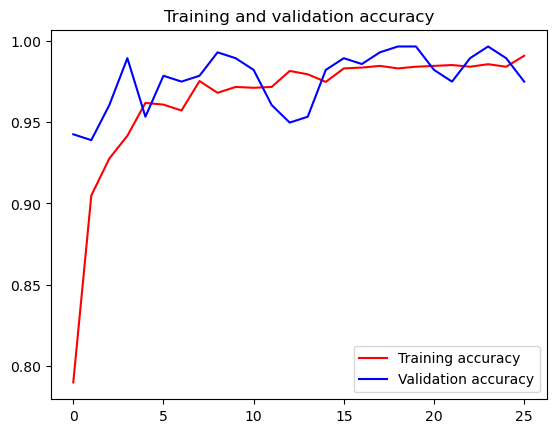

<Figure size 640x480 with 0 Axes>

In [37]:
#Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

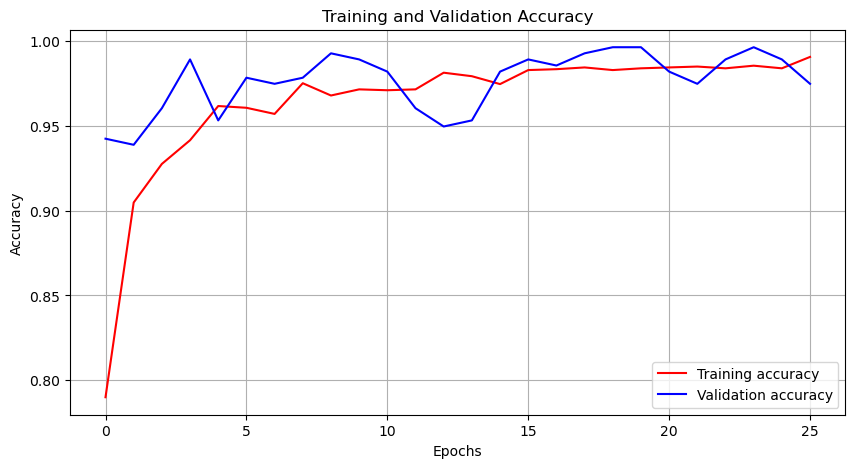

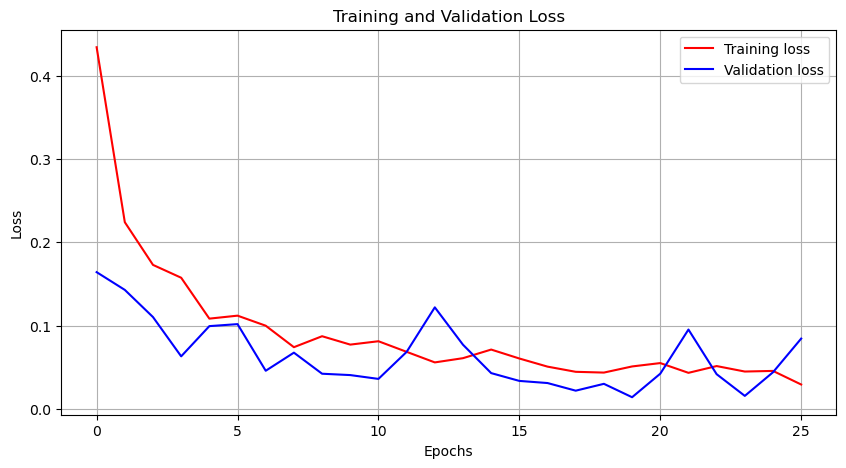

In [38]:
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your 'history' object

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [39]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
model.save("cancer2.h5")

C:\Users\AIRLIFT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
(val_label_a:=validation_generator.labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
#Y-Test
y_test_a=model.predict_generator(validation_generator)

C:\Users\AIRLIFT\AppData\Local\Temp\ipykernel_15056\166018501.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_test_a=model.predict_generator(validation_generator)


In [43]:
threshold=0.5
y_test1_a=(y_test_a>=threshold).astype(int)

In [44]:
jaccard_score(val_label_a,y_test1_a)

0.07407407407407407

In [45]:
print(classification_report(val_label_a,y_test1_a))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       238
           1       0.13      0.15      0.14        40

    accuracy                           0.73       278
   macro avg       0.49      0.49      0.49       278
weighted avg       0.75      0.73      0.74       278



In [46]:
confusion_matrix(val_label_a,y_test1_a)

array([[197,  41],
       [ 34,   6]], dtype=int64)

In [47]:
# Load the model from the HDF5 file
model = tf.keras.models.load_model('cancer2.h5')
